# Introduction 😃

Hi hi! I want to learn as much as possible about building neural networks -- I know that in practice, libraries like pytorch, tensorflow, and keras are used to optimize and abstract away the underlying linear algebra of machine learning, but I think it's valuable to delve below this layer of abstraction and understand vanilla neural network architecture, especially as a beginner, so using this notebook to follow along is really helpful.



In [102]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./data/train.csv')

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

# Model Architecture

**Forward Propogation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]})$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward Propogation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

In [104]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(X):
    return np.maximum(X, 0)

def softmax(X):
    return np.exp(X) / sum(np.exp(X))

def forward_prop(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(X):
    return X > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [128]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [129]:
lr = 0.3
EPOCHS = 1200
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, lr, EPOCHS)

Iteration:  0
0.06797560975609757
Iteration:  10
0.3027073170731707
Iteration:  20
0.4544878048780488
Iteration:  30
0.5306585365853659
Iteration:  40
0.6134390243902439
Iteration:  50
0.6821951219512196
Iteration:  60
0.7325365853658536
Iteration:  70
0.7655853658536586
Iteration:  80
0.7531463414634146
Iteration:  90
0.769390243902439
Iteration:  100
0.7942682926829269
Iteration:  110
0.8021951219512196
Iteration:  120
0.8117317073170732
Iteration:  130
0.8188780487804878
Iteration:  140
0.8249512195121951
Iteration:  150
0.829780487804878
Iteration:  160
0.8338536585365853
Iteration:  170
0.8374146341463414
Iteration:  180
0.8415365853658536
Iteration:  190
0.8449268292682927
Iteration:  200
0.8472439024390244
Iteration:  210
0.8502682926829268
Iteration:  220
0.8528292682926829
Iteration:  230
0.8550487804878049
Iteration:  240
0.8572682926829268
Iteration:  250
0.8593658536585366
Iteration:  260
0.8612682926829268
Iteration:  270
0.8625853658536585
Iteration:  280
0.86436585365853

In [130]:
def get_prediction(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(idx, W1, b1, W2, b2):
    img = X_train[:, idx, None]
    prediction = get_prediction(X_train[:, idx, None], W1, b1, W2, b2)
    label = Y_train[idx]

    print(f'Prediction: {prediction}')
    print(f'Actual: {label}')

    img = img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(img)
    plt.show()

Prediction: [3]
Actual: 3


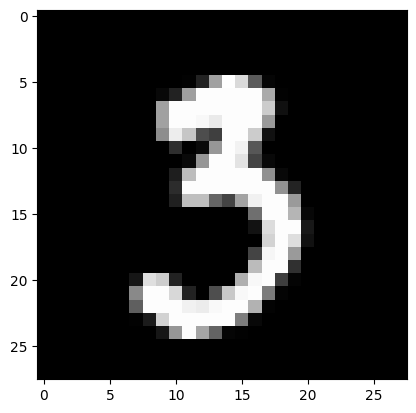

Prediction: [1]
Actual: 1


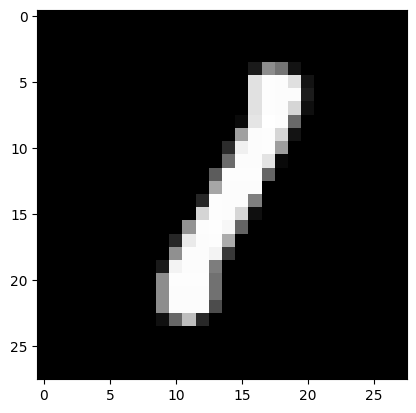

Prediction: [0]
Actual: 0


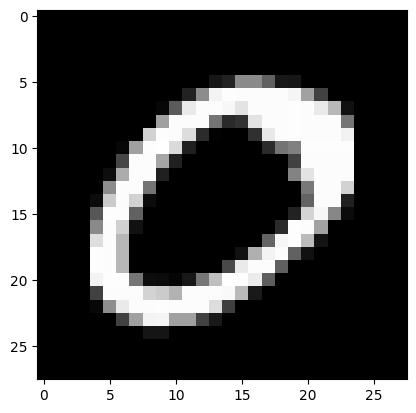

Prediction: [0]
Actual: 0


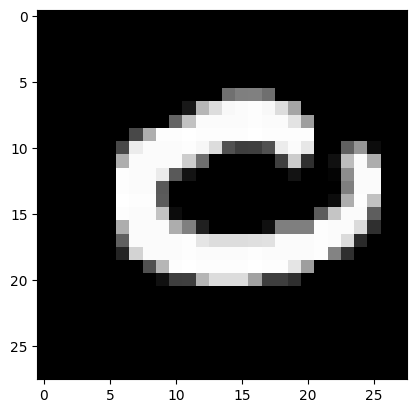

Prediction: [0]
Actual: 0


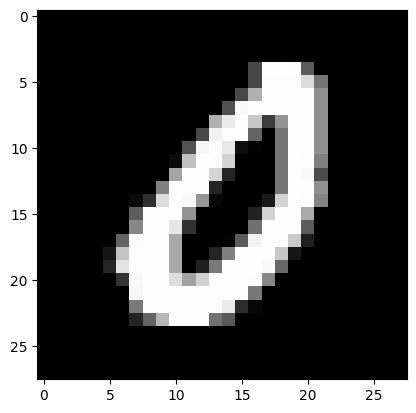

Prediction: [8]
Actual: 8


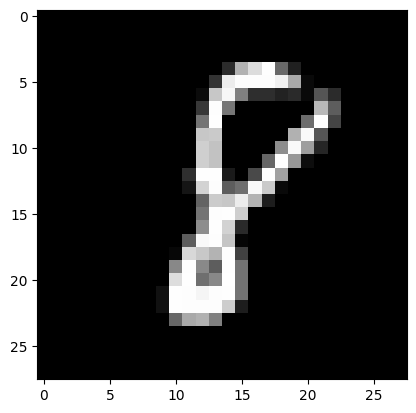

Prediction: [8]
Actual: 8


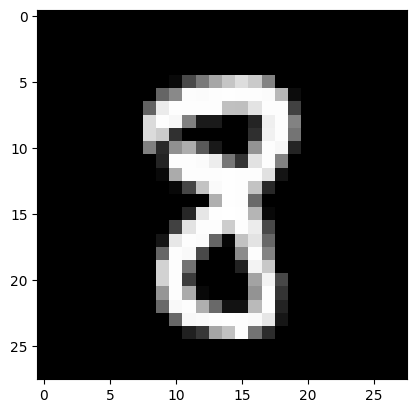

Prediction: [7]
Actual: 7


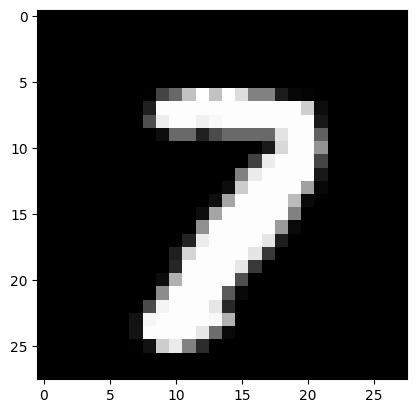

Prediction: [3]
Actual: 3


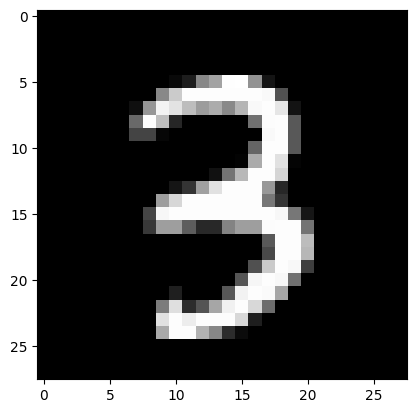

Prediction: [9]
Actual: 9


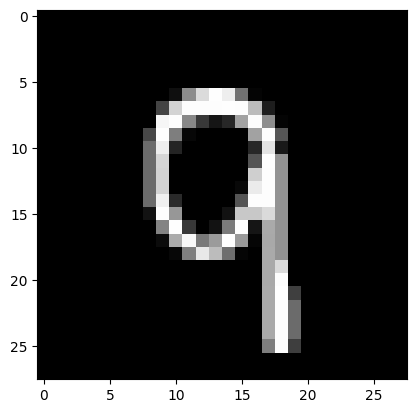

In [131]:
for i in range(10):
    test_predictions(i, W1, b1, W2, b2)

In [132]:
dev_predictions = get_prediction(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.917

# Conclusion

Achieved a $91.7$ % validation accuracy (improvement from $84$ in the video, nice!)